In [1]:
#Pandas library is imported to perform Data manipulation and analysis.
#Numpy library is used to do mathematical operations.
#Matplotlib library is used to plot graphs.
#First the excel data sheet is directly read into Jupyter notebook to get in detail information of dataset.
#Since all columns are in numerical form, there is no need for Label encoding before building the model.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sales = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Documents\\advertising.csv')
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
#The shape gives the number of rows and columns available.
sales.shape

(200, 4)

In [5]:
#More importantly this gives the datatype, this is confirmation that all columns are float type.
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
#Describe gives the statistical evaluation of data set
sales.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#In this case, the maximum amount is spent for TV and minimum for radio
print('TV column average',sales['TV'].mean())
print('Radio column average',sales['Radio'].mean())
print('Newspaper column average',sales['Newspaper'].mean())

TV column average 147.0425
Radio column average 23.264000000000024
Newspaper column average 30.553999999999995


In [9]:
#This gives the boolean answer whether a value in the data set is present or absent, if present then True is defined and if 
#absent then False is defined.
sales.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [10]:
#This gives the sum total of absent values in each columns, luckily in this dataset all values are present
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [2]:
import seaborn as sns

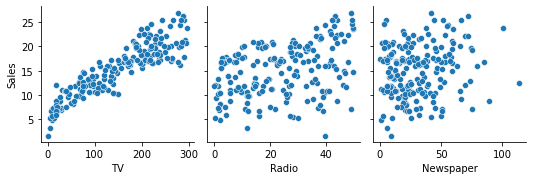

In [18]:
sns.pairplot(sales,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

#In this case first graph the TV and sales are having positive correlation, that is amount spent on advertising on tv is 
#helping in imporving sales.
#Whereas the relation between sales and advertising in Radio and Newspaper is unpredictable
#because of presence of many outliers.
#The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset.
#The scatter plot is used because of analysing two continuous variables.

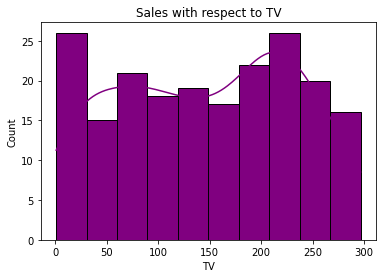

In [5]:
sns.histplot(sales['TV'],bins=10,kde=True,facecolor='purple')
plt.xlabel('TV')
plt.title('Sales with respect to TV')
plt.show()

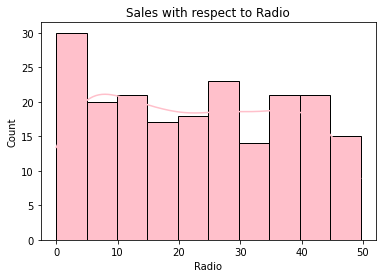

In [20]:
sns.histplot(sales['Radio'],bins=10,kde=True,facecolor='pink')
plt.xlabel('Radio')
plt.title('Sales with respect to Radio')
plt.show()

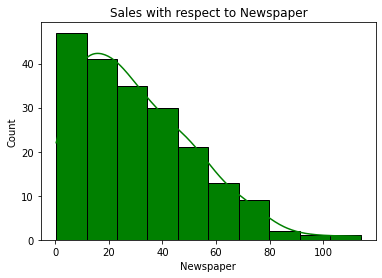

In [22]:
sns.histplot(sales['Newspaper'],bins=10,kde=True,facecolor='green')
plt.xlabel('Newspaper')
plt.title('Sales with respect to Newspaper')
plt.show()

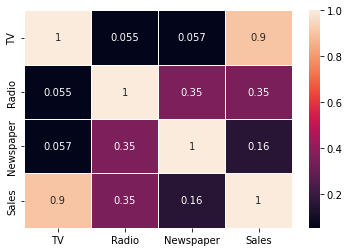

In [26]:
sns.heatmap(sales.corr(),annot=True,linewidth=1)
plt.show()

#The heat map gives the snapshot of relation between two variables.
#If value is 1 or near to 1 then it has positive correlation and if any value is negative, then it has negative correlation

MODEL BUILDING

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sales[['TV']],sales[['Sales']],test_size=0.3)

print(x_train)

#In this case the model is built such that 70% of data is used for training and building and 30% for testing
#Hence the number of rows in x_train are less than the original value
#test_size gives the indication that we are selecting 30% of data for testing
#Here only TV and sales have positive correlation and hence only these columns are used for model building.

        TV
111  241.7
56     7.3
26   142.9
143  104.6
131  265.2
..     ...
150  280.7
37    74.7
125   87.2
53   182.6
156   93.9

[140 rows x 1 columns]


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


print('Accuracy of linear regression model is: ',model.score(x_test,y_test)*100)

predicted = model.score(x_test,y_test)*100
#print(predicted)



Accuracy of linear regression model is:  83.87512188160952
